In [46]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,f1_score
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.preprocessing import binarize,minmax_scale,PolynomialFeatures
from sklearn import impute
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from sklearn.tree import export_graphviz
from collections import Counter
from IPython.display import Image  
from sklearn import tree
from os import system


In [47]:
bank_df=pd.read_csv('bank-full.csv',sep=',')

In [48]:
bank_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [49]:
#we have 45211 rows and 17 columns.
bank_df.shape

(45211, 17)


Categorical variables:job,marital,education,default,housing,loan,contact,day,month,poutcome,Target

Quantitative variables:age,balance,duration,campaign,pdays,previous

In [50]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Checking for null values

In [4]:
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

Checking for missing values

In [5]:
bank_df[bank_df=='?'].sum()

D:\Anaconda\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
Target       0.0
dtype: float64

We have 45211 records in total,5 point summary will help to indicate the outliers if any and skeness of the data.we may further need to analyse using different exploratory analysis.
marital    - almost half of the data belongs to one category and rest to other 2
education  - almost half of the data belongs to one category and rest to other 3
default    - among 2 most of the data belongs to one category shows skewness in the data.
balance    - huge std in the balance shows the skewness in data.
similarily loan, contact, month ,poutcome and target is having skewness, most belongs to one category

In [6]:
bank_df.describe(include='all').transpose()

count unique          top   freq      mean      std   min  25%  \
age        45211    NaN          NaN    NaN   40.9362  10.6188    18   33   
job        45211     12  blue-collar   9732       NaN      NaN   NaN  NaN   
marital    45211      3      married  27214       NaN      NaN   NaN  NaN   
education  45211      4    secondary  23202       NaN      NaN   NaN  NaN   
default    45211      2           no  44396       NaN      NaN   NaN  NaN   
balance    45211    NaN          NaN    NaN   1362.27  3044.77 -8019   72   
housing    45211      2          yes  25130       NaN      NaN   NaN  NaN   
loan       45211      2           no  37967       NaN      NaN   NaN  NaN   
contact    45211      3     cellular  29285       NaN      NaN   NaN  NaN   
day        45211    NaN          NaN    NaN   15.8064  8.32248     1    8   
month      45211     12          may  13766       NaN      NaN   NaN  NaN   
duration   45211    NaN          NaN    NaN   258.163  257.528     0  103   
campaign   45211    NaN          NaN    NaN   2.76384  3.09802     1    1   
pdays      45211    NaN          NaN    NaN   40.1978  100.129    -1   -1   
previous   45211    NaN          NaN    NaN  0.580323  2.30344     0    0   
poutcome   45211      4      unknown  36959       NaN      NaN   NaN  NaN   
Target     45211      2           no  39922       NaN      NaN   NaN  NaN   

           50%   75%     max  
age         39    48      95  
job        NaN   NaN     NaN  
marital    NaN   NaN     NaN  
education  NaN   NaN     NaN  
default    NaN   NaN     NaN  
balance    448  1428  102127  
housing    NaN   NaN     NaN  
loan       NaN   NaN     NaN  
contact    NaN   NaN     NaN  
day         16    21      31  
month      NaN   NaN     NaN  
duration   180   319    4918  
campaign     2     3      63  
pdays       -1    -1     871  
previous     0     0     275  
poutcome   NaN   NaN     NaN  
Target     NaN   NaN     NaN

Different plots to check on the string and numeric data

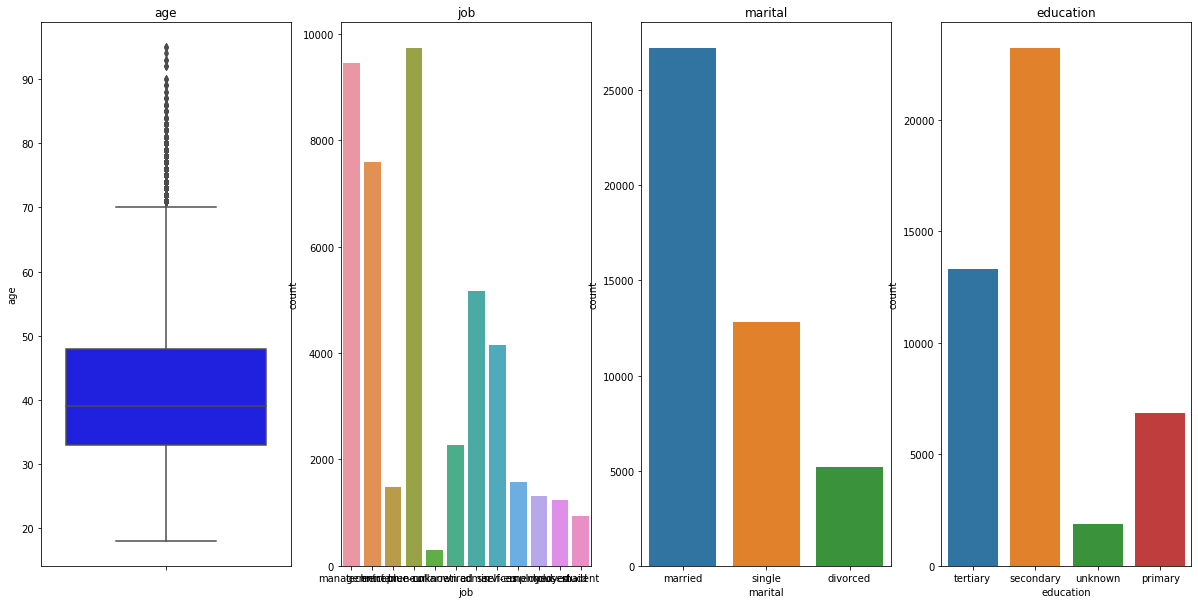

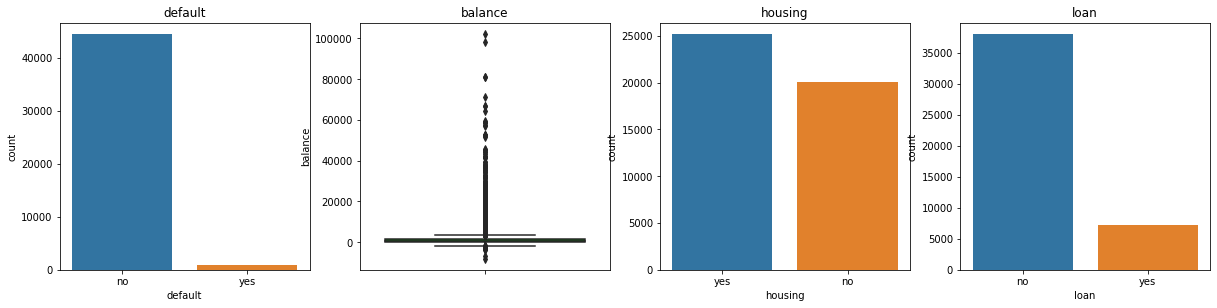

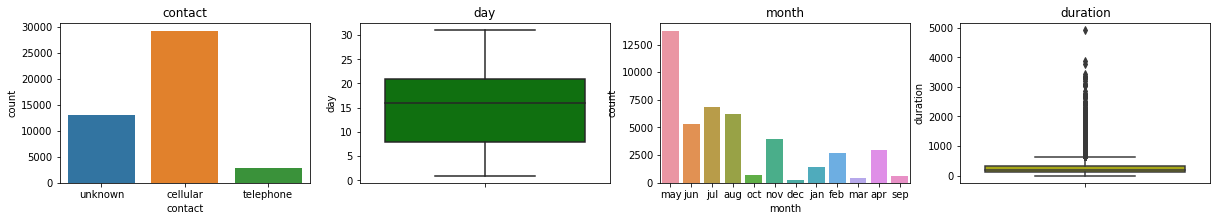

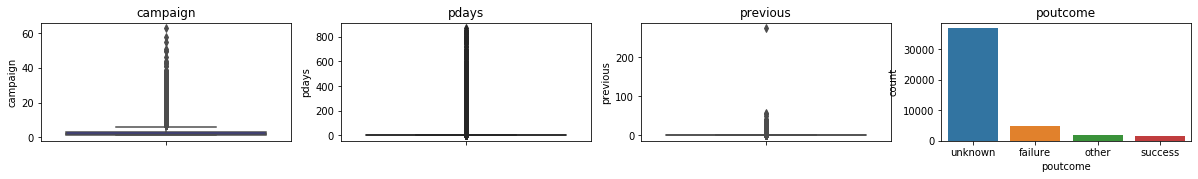

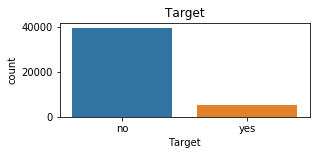

In [10]:
i=0
cnt=1
subplt=0
col=['b','g','r','y']

for columns in bank_df.columns:
    type=bank_df.dtypes[i]
    if cnt in (1,5,9,13,17):
        plt.figure(figsize=(26,10))
        subplt+=1
        cnt=1
    
    
    
    
    plt.subplot(subplt,5,cnt)
    plt.title(columns)
    
    
    if type == 'int64':
        sns.boxplot(bank_df[columns],color=col[cnt-1],orient='v')
        
    else:
        sns.countplot(bank_df[columns])
            
    i+=1
    cnt+=1
    
        


Histogram to check on the distribution for numeric attributes

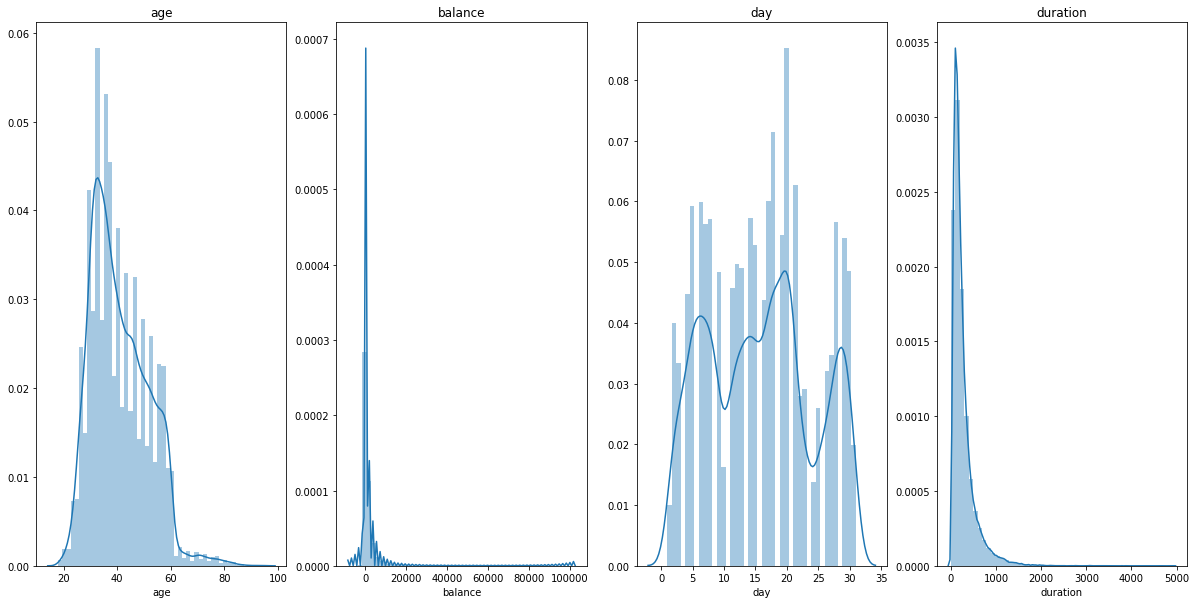

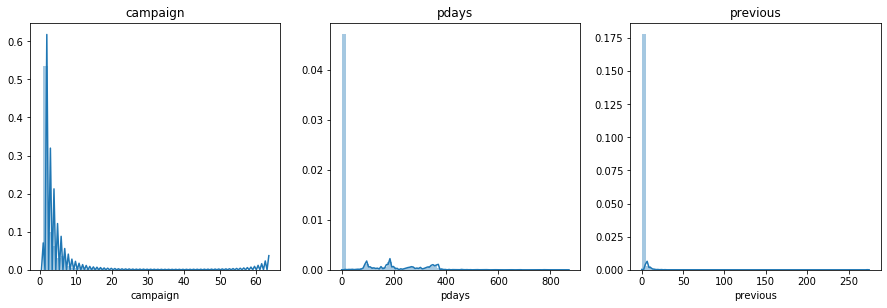

In [11]:
i=0
cnt=1
subplt=0
col=['b','g','r','y']

for columns in bank_df.columns:
    type=bank_df.dtypes[i]
    
    if cnt in (1,5,9,13,17):
        plt.figure(figsize=(26,10))
        subplt+=1
        cnt=1
  
    
    if type == 'int64':
        plt.subplot(subplt,5,cnt)
        plt.title(columns)
        sns.distplot(bank_df[columns])
        cnt+=1
    i+=1
    
        


Checking the correlation

In [149]:
bank_df.corr()

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000

Preparing data to train the model by converting the string variables to numeric attributes

In [51]:
dict_replace_job={'unknown':0,'student':1,'housemaid':2
                 ,'unemployed':3,'entrepreneur':4,'self-employed':5
                 ,'services':6,'retired':7,'admin.':8,'technician':9
                 ,'blue-collar':10,'management':11}
dict_replace_marital={'single':1,'married':2,'divorced':3}
dict_replace_education={'unknown':0,'primary':1,'secondary':2,'tertiary':3}
dict_replace_contact={'unknown':0,'telephone':1,'cellular':2}
dict_replace_month={'jan':1,'feb':2,'mar':3
                 ,'apr':4,'may':5,'jun':6
                 ,'jul':7,'aug':8,'sep':9,'oct':10
                 ,'nov':11,'dec':12}
dict_replace_poutcome={'unknown':0,'other':1,'failure':2
                 ,'success':3}


In [53]:
bank_numeric_df=bank_df.copy()
bank_numeric_df['job']=bank_numeric_df['job'].replace(dict_replace_job)
bank_numeric_df['marital']=bank_numeric_df['marital'].replace(dict_replace_marital)
bank_numeric_df['education']=bank_numeric_df['education'].replace(dict_replace_education)
bank_numeric_df['contact']=bank_numeric_df['contact'].replace(dict_replace_contact)
bank_numeric_df['month']=bank_numeric_df['month'].replace(dict_replace_month)
bank_numeric_df['poutcome']=bank_numeric_df['poutcome'].replace(dict_replace_poutcome)
bank_numeric_df['default']=pd.Series(pd.Categorical(np.array(bank_numeric_df['default'])).codes)
bank_numeric_df['housing']=pd.Series(pd.Categorical(np.array(bank_numeric_df['housing'])).codes)
bank_numeric_df['loan']=pd.Series(pd.Categorical(np.array(bank_numeric_df['loan'])).codes)
bank_numeric_df['Target']=pd.Series(pd.Categorical(np.array(bank_numeric_df['Target'])).codes)

In [11]:
bank_numeric_df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58   11        2          3        0     2143        1     0        0   
1   44    9        1          2        0       29        1     0        0   
2   33    4        2          2        0        2        1     1        0   
3   47   10        2          0        0     1506        1     0        0   
4   33    0        1          0        0        1        0     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  Target  
0    5      5       261         1     -1         0         0       0  
1    5      5       151         1     -1         0         0       0  
2    5      5        76         1     -1         0         0       0  
3    5      5        92         1     -1         0         0       0  
4    5      5       198         1     -1         0         0       0

In [12]:
bank_numeric_df.corr()




age       job   marital  education   default   balance  \
age        1.000000 -0.030329  0.403240  -0.173615 -0.017879  0.097783   
job       -0.030329  1.000000  0.023385   0.184739  0.000330  0.005363   
marital    0.403240  0.023385  1.000000  -0.095415  0.007023 -0.002122   
education -0.173615  0.184739 -0.095415   1.000000 -0.009035  0.050572   
default   -0.017879  0.000330  0.007023  -0.009035  1.000000 -0.066745   
balance    0.097783  0.005363 -0.002122   0.050572 -0.066745  1.000000   
housing   -0.185513  0.117248  0.016096  -0.038689 -0.006025 -0.068768   
loan      -0.015655  0.021334  0.046893   0.004307  0.077234 -0.084350   
contact   -0.026221  0.004144 -0.039201   0.151481 -0.015404  0.027273   
day       -0.009120  0.017036  0.005261   0.021661  0.009424  0.004503   
month      0.092903  0.015710  0.050938   0.067935  0.014989  0.094605   
duration  -0.004648 -0.005146 -0.011852   0.002554 -0.010021  0.021560   
campaign   0.004760  0.024381  0.008994   0.000194  0.016822 -0.014578   
pdays     -0.023758  0.015068 -0.019172   0.007092 -0.029979  0.003435   
previous   0.001288  0.009620 -0.014973   0.025295 -0.018329  0.016674   
poutcome   0.014363 -0.003983 -0.024731   0.041036 -0.039593  0.034865   
Target     0.025155 -0.033127 -0.045588   0.051341 -0.022419  0.052838   

            housing      loan   contact       day     month  duration  \
age       -0.185513 -0.015655 -0.026221 -0.009120  0.092903 -0.004648   
job        0.117248  0.021334  0.004144  0.017036  0.015710 -0.005146   
marital    0.016096  0.046893 -0.039201  0.005261  0.050938 -0.011852   
education -0.038689  0.004307  0.151481  0.021661  0.067935  0.002554   
default   -0.006025  0.077234 -0.015404  0.009424  0.014989 -0.010021   
balance   -0.068768 -0.084350  0.027273  0.004503  0.094605  0.021560   
housing    1.000000  0.041323 -0.188123 -0.027982 -0.173887  0.005075   
loan       0.041323  1.000000  0.010873  0.011370  0.021638 -0.012412   
contact   -0.188123  0.010873  1.000000  0.027936  0.173779  0.020839   
day       -0.027982  0.011370  0.027936  1.000000  0.101989 -0.030206   
month     -0.173887  0.021638  0.173779  0.101989  1.000000 -0.011866   
duration   0.005075 -0.012412  0.020839 -0.030206 -0.011866  1.000000   
campaign  -0.023599  0.009980 -0.019614  0.162490  0.054868 -0.084570   
pdays      0.124178 -0.022754  0.244816 -0.093044 -0.108940 -0.001565   
previous   0.037076 -0.011043  0.147811 -0.051710 -0.035600  0.001203   
poutcome   0.031062 -0.039928  0.272710 -0.081519 -0.036046  0.013304   
Target    -0.139173 -0.068185  0.148395 -0.028348  0.018717  0.394521   

           campaign     pdays  previous  poutcome    Target  
age        0.004760 -0.023758  0.001288  0.014363  0.025155  
job        0.024381  0.015068  0.009620 -0.003983 -0.033127  
marital    0.008994 -0.019172 -0.014973 -0.024731 -0.045588  
education  0.000194  0.007092  0.025295  0.041036  0.051341  
default    0.016822 -0.029979 -0.018329 -0.039593 -0.022419  
balance   -0.014578  0.003435  0.016674  0.034865  0.052838  
housing   -0.023599  0.124178  0.037076  0.031062 -0.139173  
loan       0.009980 -0.022754 -0.011043 -0.039928 -0.068185  
contact   -0.019614  0.244816  0.147811  0.272710  0.148395  
day        0.162490 -0.093044 -0.051710 -0.081519 -0.028348  
month      0.054868 -0.108940 -0.035600 -0.036046  0.018717  
duration  -0.084570 -0.001565  0.001203  0.013304  0.394521  
campaign   1.000000 -0.088628 -0.032855 -0.111592 -0.073172  
pdays     -0.088628  1.000000  0.454820  0.790806  0.103621  
previous  -0.032855  0.454820  1.000000  0.481341  0.093236  
poutcome  -0.111592  0.790806  0.481341  1.000000  0.221128  
Target    -0.073172  0.103621  0.093236  0.221128  1.000000

Heat map to check the correlation 

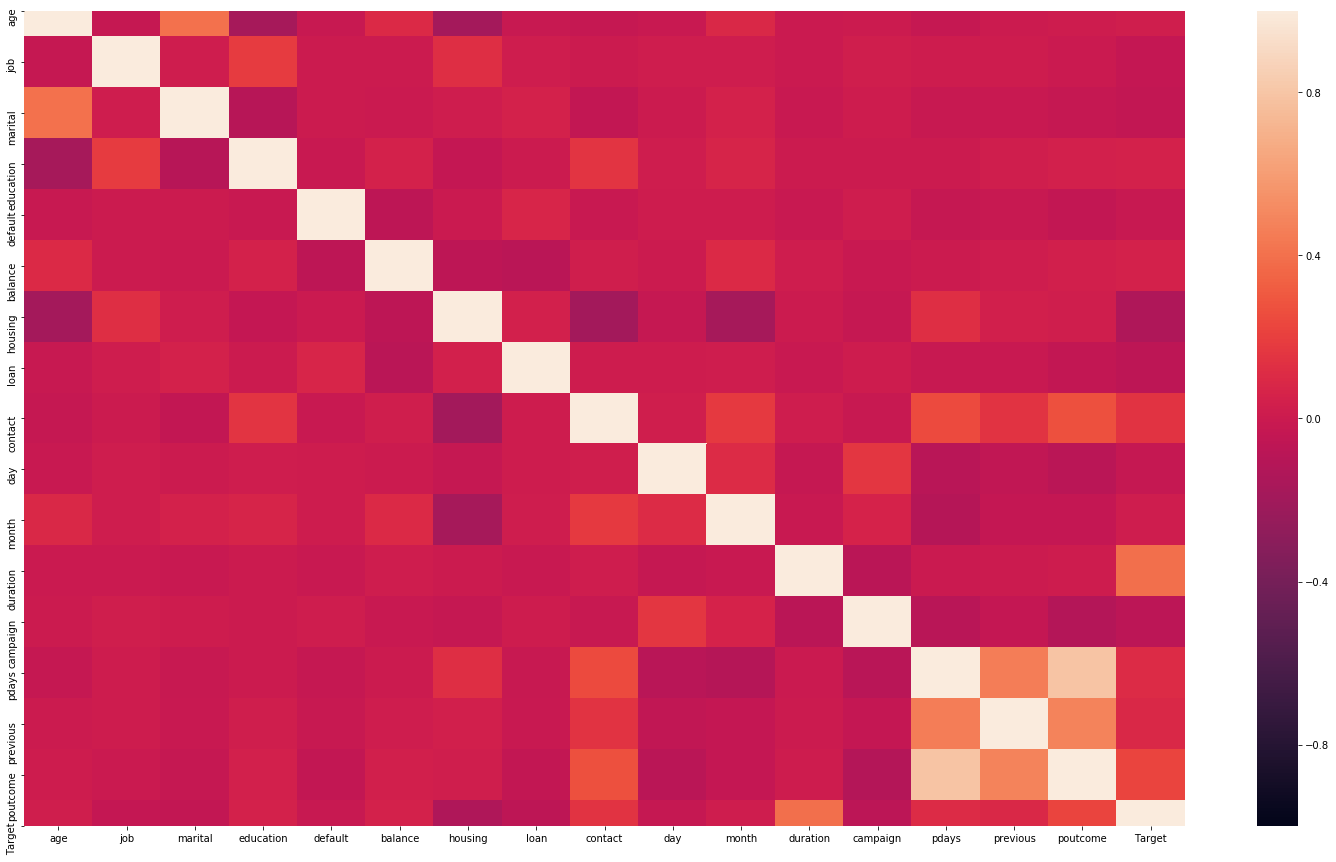

In [13]:
plt.figure(figsize=(26,15))
sns.heatmap(bank_numeric_df.corr(),vmin=-1,vmax=1)

using info() to identify the missing values and datatypes of the source data. i have converted all the data to numeric attributes if we have missing values like '?' or some characters info will return the datatype as object.

In [155]:
bank_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int64
marital      45211 non-null int64
education    45211 non-null int64
default      45211 non-null int8
balance      45211 non-null int64
housing      45211 non-null int8
loan         45211 non-null int8
contact      45211 non-null int64
day          45211 non-null int64
month        45211 non-null int64
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int64
Target       45211 non-null int8
dtypes: int64(13), int8(4)
memory usage: 4.7 MB



The below are the boxplot to check the outliers on the data. we have outliers on previous and that needs to be cleaned. we have value as -1 in pdays for there is no call made previously and all of them are having poutcome as unknown. pdays and previous are impacting poutcome but it is not impactiong directly on the current campaign target.

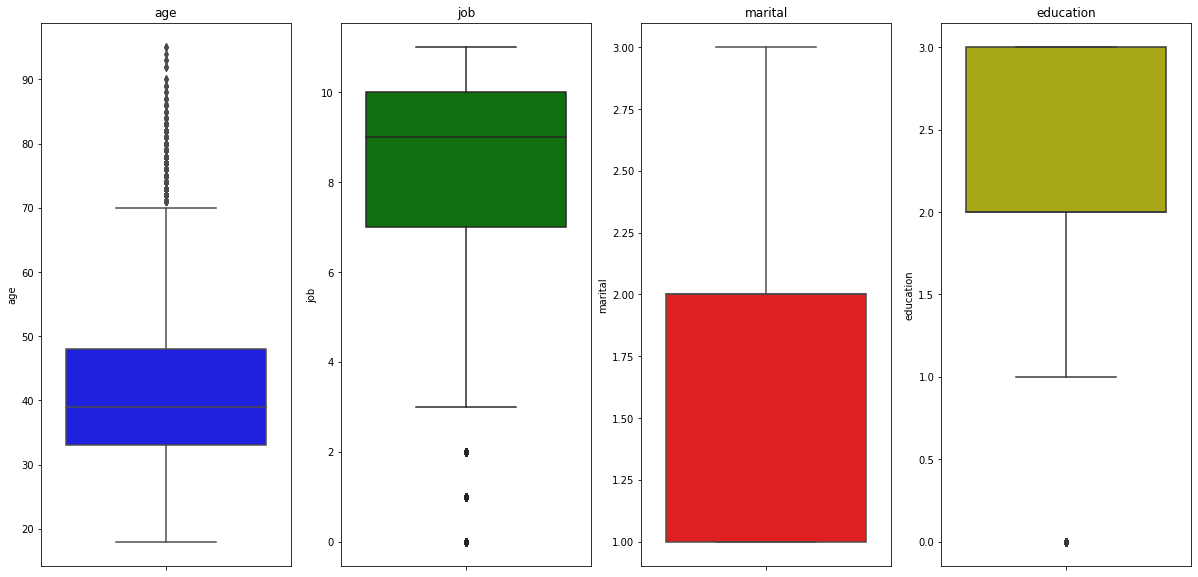

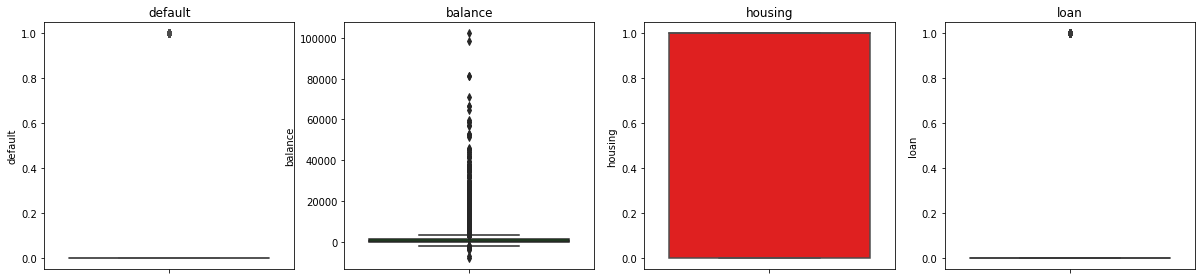

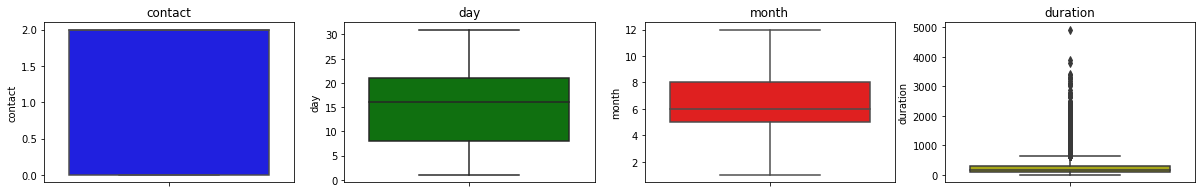

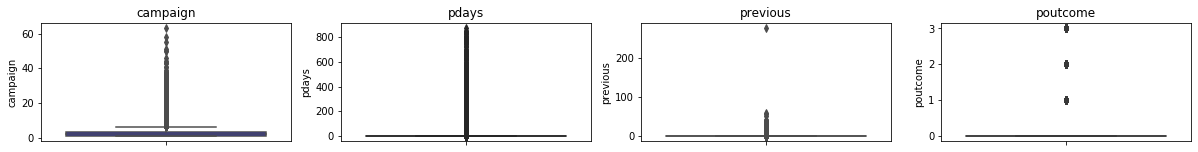

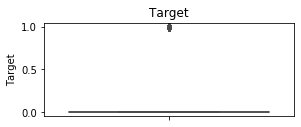

In [15]:
i=0
cnt=1
subplt=0
col=['b','g','r','y']

for columns in bank_numeric_df.columns:
    type=bank_df.dtypes[i]
    if cnt in (1,5,9,13,17):
        plt.figure(figsize=(26,10))
        subplt+=1
        cnt=1

    plt.subplot(subplt,5,cnt)
    plt.title(columns)
    sns.boxplot(bank_numeric_df[columns],color=col[cnt-1],orient='v')
    
    i+=1
    cnt+=1
    
        



The below are the boxplot to check the outliers on the data. we have outliers on previous and that needs to be cleaned. we have value as -1 in pdays for there is no call made previously and all of them are having poutcome as unknown. pdays and previous are impacting poutcome but it is not impactiong directly on the current campaign target.

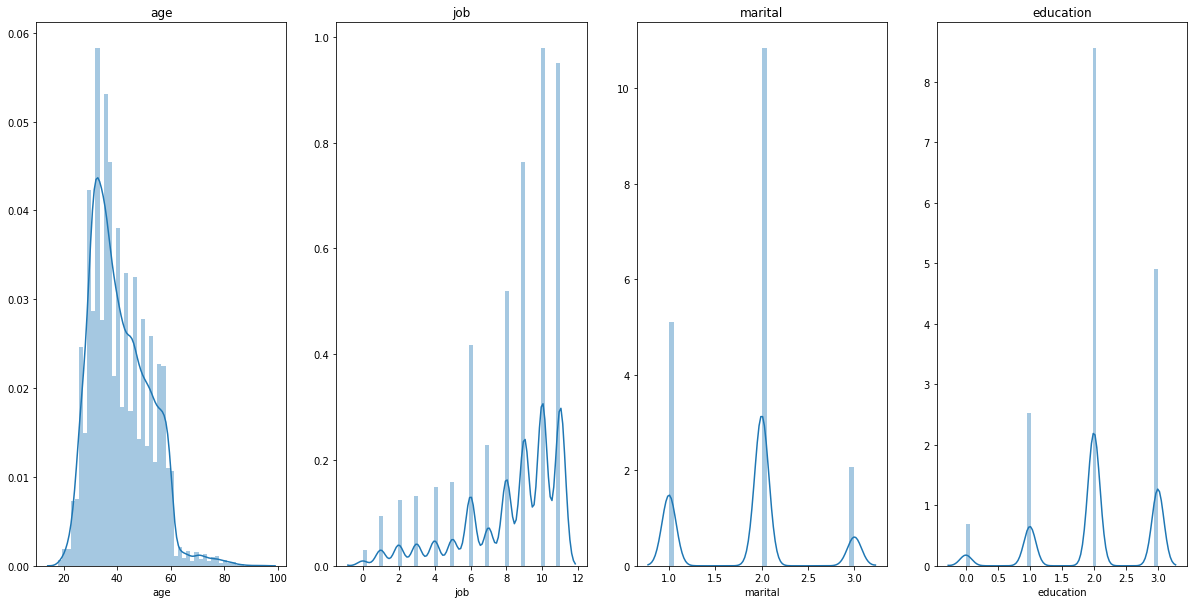

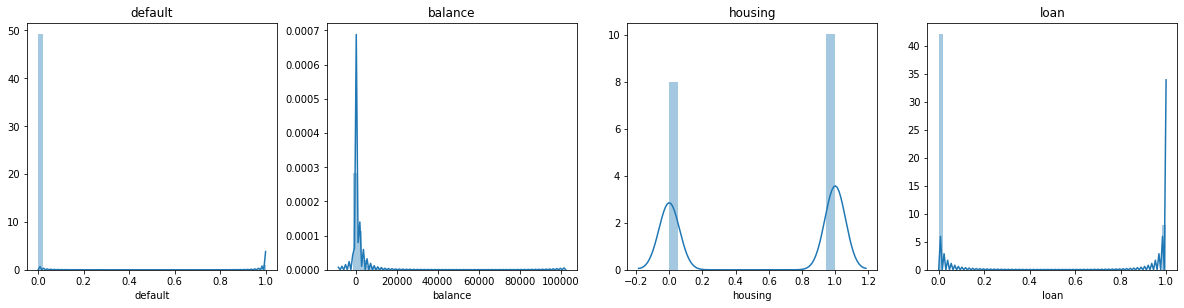

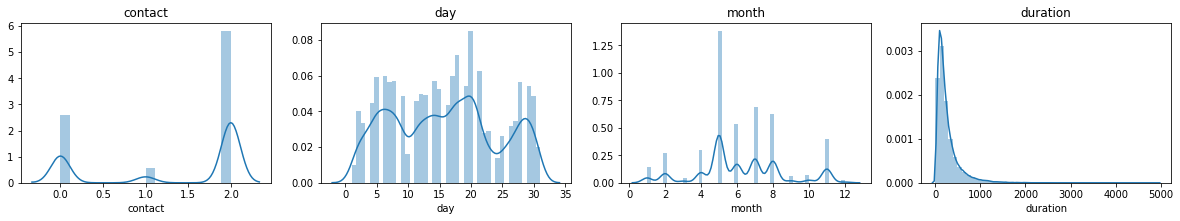

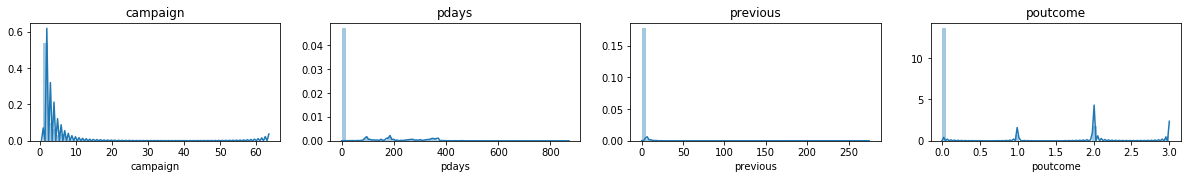

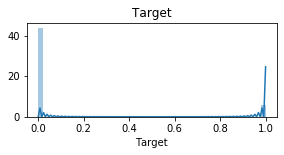

In [24]:
i=0
cnt=1
subplt=0
col=['b','g','r','y']

for columns in bank_numeric_df.columns:
        
    if cnt in (1,5,9,13,17):
        plt.figure(figsize=(26,10))
        subplt+=1
        cnt=1

    plt.subplot(subplt,5,cnt)
    plt.title(columns)
    sns.distplot(bank_numeric_df[columns])
    cnt+=1
    i+=1
    
        


The below are the box plot to find the attributes impact on the target variables. If there is no overlap it will directly influence the target prediction.

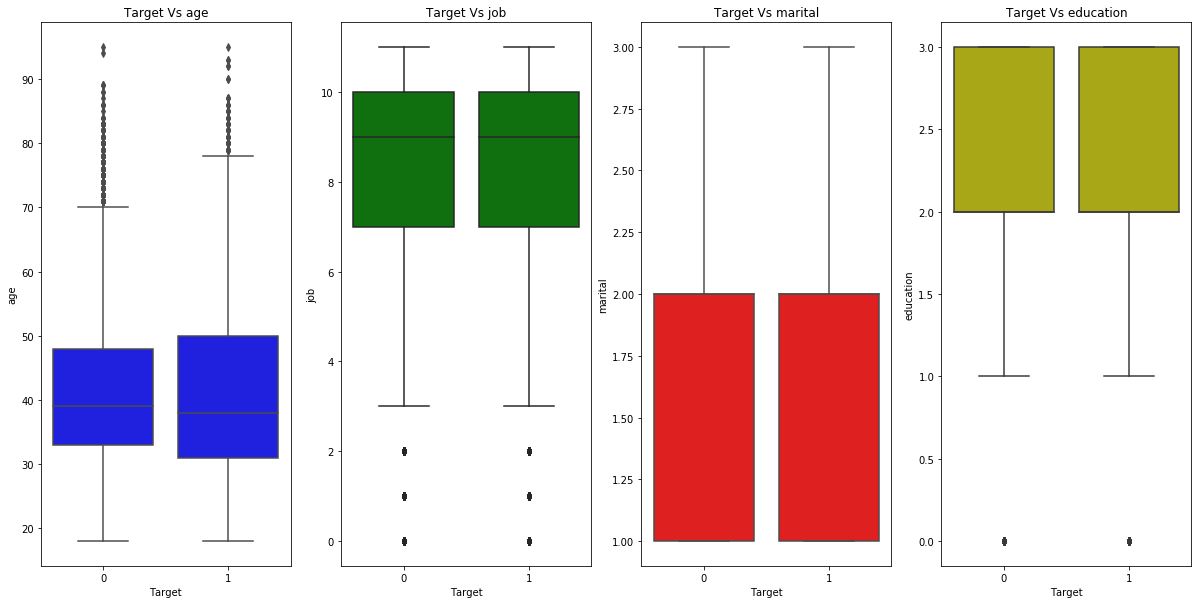

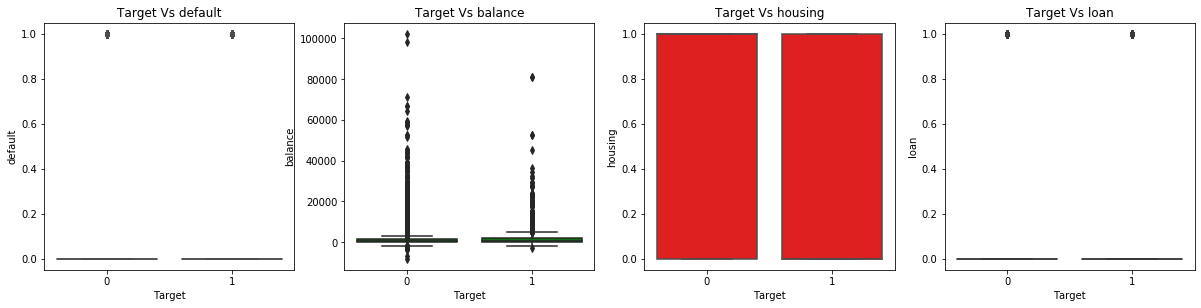

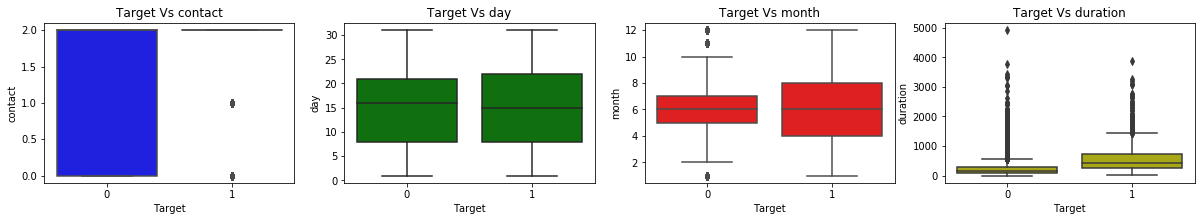

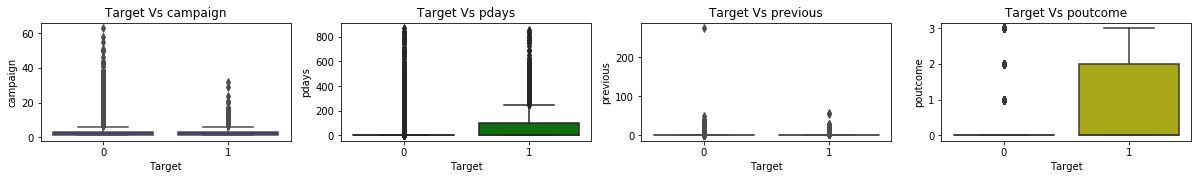

<Figure size 1872x720 with 0 Axes>

In [25]:
i=0
cnt=1
subplt=0
col=['b','g','r','y']

for columns in bank_numeric_df.columns:
    
    if cnt in (1,5,9,13,17):
        plt.figure(figsize=(26,10))
        subplt+=1
        cnt=1
    if columns != 'Target':
        plt.subplot(subplt,5,cnt)
        plt.title('Target Vs '+ columns)
        sns.boxplot(bank_numeric_df['Target'],bank_numeric_df[columns],color=col[cnt-1],orient='v')
    
    i+=1
    cnt+=1
    
        


Checking pairplot for corelation

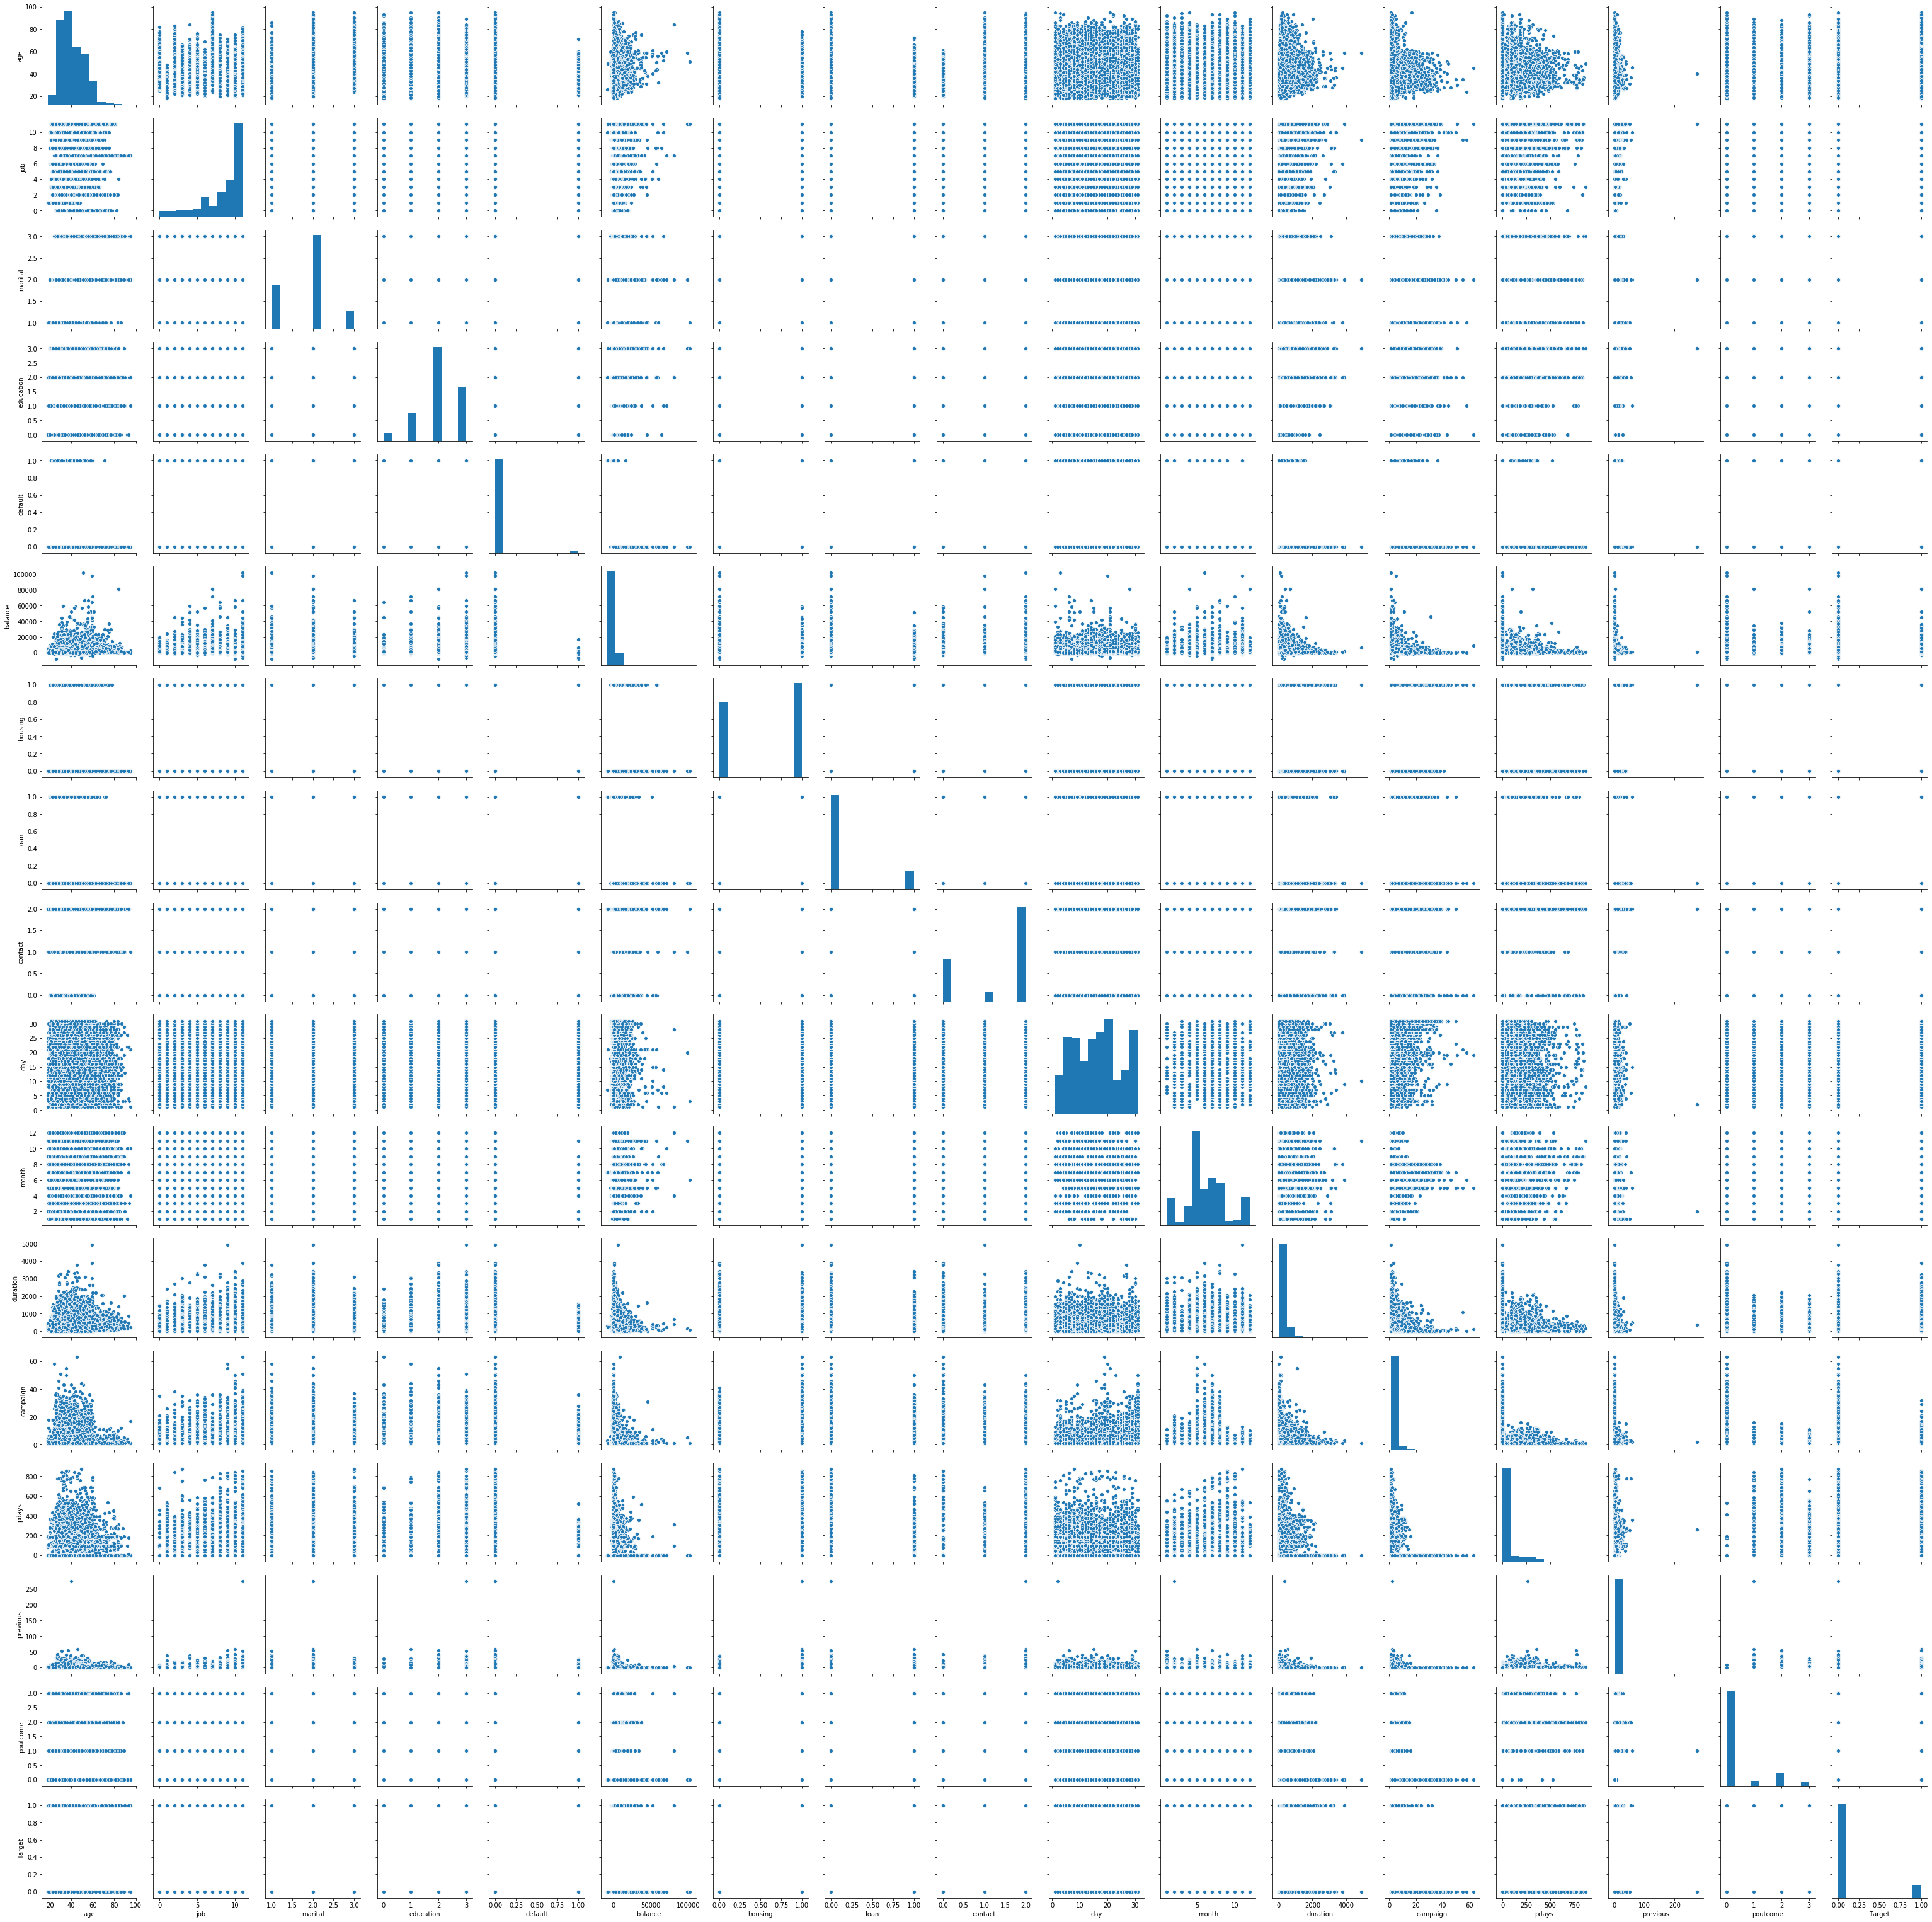

In [16]:
sns.pairplot(bank_numeric_df)

clearing the outlier 

In [54]:
#To clear the outlier in previous
bank_numeric_df['previous']=[i if i < 200 else round(np.mean(bank_numeric_df['previous'])*100) for i in bank_numeric_df['previous']  ]

In [55]:
#To clear the outlier in balance
bank_numeric_df['balance']=[i if i < 20000 else np.mean(bank_numeric_df['balance']) for i in bank_numeric_df['balance']  ]

In [56]:
#To clear the outlier in campaign
bank_numeric_df['campaign']=[i if i < 15 else np.mean(bank_numeric_df['campaign']) for i in bank_numeric_df['campaign']  ]

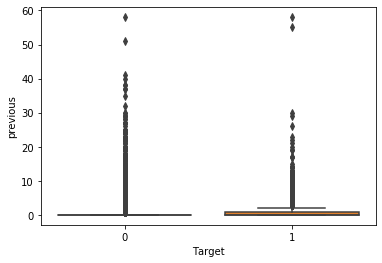

In [16]:
sns.boxplot(bank_numeric_df['Target'],bank_numeric_df['previous'],orient='v')

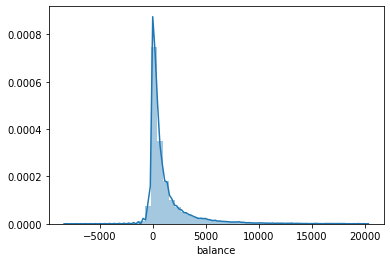

In [51]:
sns.distplot(bank_numeric_df['balance'])

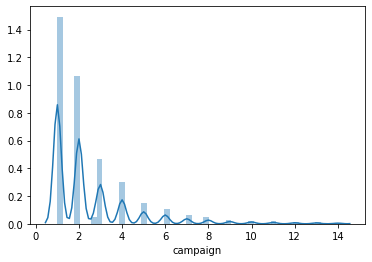

In [17]:
sns.distplot(bank_numeric_df['campaign'])

Overall EDA Summary

Except duration we dont have individual variable to influence the target dependency(duration cannot be used as it will not be available during the time of call). No of times contacted previously have impact on previos outcome on considering that campaign which is no of times contacted on this campaign will also be the important feature for our target variable. Who ever not opted for term deposit have have more chance to opt this time compared to who already opted.Housing is having mild negative corelation which indicates that who ever not opted for housing loan have little chance to opt for term deposit.Who ever contacted thhrough cellular have high chance than other contacted mode.Lot of contacts happened on may month, split based on month may be a factor in segregating the data along with other features.After certain point of balance we have less chance for opting term deposit.
Below are the important features identified using the EDA
poutcome
campaign
housing
month
contact
balance


In [57]:
x=bank_numeric_df[ [i for i in bank_numeric_df.columns if i not in ('Target','duration')]]
y=bank_numeric_df['Target']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)
Final_score_cmp=pd.DataFrame(columns=['Score_type','Score_value','Score_model'])

In [58]:
class models():
    def __init__(self,name):
        self.name=name
    def linearfunction(self,xtrain,xtest,ytrain,ytest):
        self.model=LogisticRegression()
        self.model.fit(xtrain,ytrain)
        self.ytest_predicted=self.model.predict(xtest)
    def knnfunction(self,n,xtrain,xtest,ytrain,ytest):
        self.model=KNeighborsClassifier(n_neighbors=n)
        self.model.fit(xtrain,ytrain)
        self.ytest_predicted=self.model.predict(xtest)
    def NBfunction(self,xtrain,xtest,ytrain,ytest):
        self.model=GaussianNB()
        self.model.fit(xtrain,ytrain)
        self.ytest_predicted=self.model.predict(xtest)
    def SVMfunction(self,c,g,xtrain,xtest,ytrain,ytest):
        self.model=SVC(C=c,gamma=g)
        self.model.fit(xtrain,ytrain)
        self.ytest_predicted=self.model.predict(xtest)
    def Decisiontreefunction(self,xtrain,xtest,ytrain,ytest):
        self.model=DecisionTreeClassifier(random_state=1)
        self.model.fit(xtrain,ytrain)
        self.ytest_predicted=self.model.predict(xtest)
    def PrunedDecisiontreefunction(self,m,xtrain,xtest,ytrain,ytest):
        self.model=DecisionTreeClassifier(max_depth=m,random_state=1)
        self.model.fit(xtrain,ytrain)
        self.ytest_predicted=self.model.predict(xtest)
    def Baggingfunction(self,xtrain,xtest,ytrain,ytest):
        self.model=BaggingClassifier(random_state=1,n_estimators=50,max_samples=0.8,oob_score=True)
        self.model.fit(xtrain,ytrain)
        self.ytest_predicted=self.model.predict(xtest)
    def AdaBoostfunction(self,xtrain,xtest,ytrain,ytest):
        self.model=AdaBoostClassifier(random_state=1,n_estimators=50)
        self.model.fit(xtrain,ytrain)
        self.ytest_predicted=self.model.predict(xtest)
    def GradientBoostfunction(self,xtrain,xtest,ytrain,ytest):
        self.model=GradientBoostingClassifier(random_state=1,n_estimators=50)
        self.model.fit(xtrain,ytrain)
        self.ytest_predicted=self.model.predict(xtest)
    def Randomforestfunction(self,xtrain,xtest,ytrain,ytest):
        self.model=RandomForestClassifier(random_state=1,n_estimators=50,oob_score=True,max_features=5)
        self.model.fit(xtrain,ytrain)
        self.ytest_predicted=self.model.predict(xtest)
    def scores(self,modelname,ytest,ytest_predicted):
        accuracy,recall,precision,f1=accuracy_score(ytest,ytest_predicted),recall_score(ytest,ytest_predicted),precision_score(ytest,ytest_predicted),f1_score(ytest,ytest_predicted)
        print('Acccuracy_score for', modelname , 'is ', accuracy)
        print('Recall_score for', modelname , 'is ', recall)
        print('Precision_score for', modelname , 'is ', precision)
        print('F1_score for', modelname , 'is ', f1)
        print('\n')
        return accuracy,recall,precision,f1 

In [59]:
class ensemblemodels():
    def __init__(self,name):
        self.name=name
    def knnfunction(self,n,xtrain,xtest,ytrain,ytest):
        self.model=KNeighborsClassifier(n_neighbors=n)
        self.model.fit(xtrain,ytrain)
        self.ytest_predicted=self.model.predict(xtest)
    def NBfunction(self,xtrain,xtest,ytrain,ytest):
        self.model=GaussianNB()
        self.model.fit(xtrain,ytrain)
        self.ytest_predicted=self.model.predict(xtest)
    def PrunedDecisiontreefunction(self,m,xtrain,xtest,ytrain,ytest):
        self.model=DecisionTreeClassifier(max_depth=m,random_state=1)
        self.model.fit(xtrain,ytrain)
        self.ytest_predicted=self.model.predict(xtest)
    def Baggingfunction(self,base,n_estimator,xtrain,xtest,ytrain,ytest):
        self.model=BaggingClassifier(random_state=1,base_estimator=base,n_estimators=n_estimator)
        self.model.fit(xtrain,ytrain)
        self.ytest_predicted=self.model.predict(xtest)
    def Randomforestfunction(self,n_estimator,mf,md,xtrain,xtest,ytrain,ytest):
        self.model=RandomForestClassifier(random_state=1,n_estimators=n_estimator,oob_score=True,max_features=mf,max_depth=md)
        self.model.fit(xtrain,ytrain)
        self.ytest_predicted=self.model.predict(xtest)
    def scores(self,modelname,ytest,ytest_predicted):
        accuracy,recall,precision,f1=accuracy_score(ytest,ytest_predicted),recall_score(ytest,ytest_predicted),precision_score(ytest,ytest_predicted),f1_score(ytest,ytest_predicted)
        print('Acccuracy_score for', modelname , 'is ', accuracy)
        print('Recall_score for', modelname , 'is ', recall)
        print('Precision_score for', modelname , 'is ', precision)
        print('F1_score for', modelname , 'is ', f1)
        print('\n')
        return accuracy,recall,precision,f1 

Evaluating model with all features

In [60]:
#Logistic regression with 0.5 probability
mname='Logic_clf'
Logistic_model=models(mname)
Logistic_model.linearfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=Logistic_model.scores(Logistic_model.name,ytest,Logistic_model.ytest_predicted)
score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])
Final_score_cmp=Final_score_cmp.append(score_df)

#KNN classifier
n=3
mname='KNN_classifier '+str(n)+' neighbour'

KNN_model=models(mname)
KNN_model.knnfunction(n,xtrain,xtest,ytrain,ytest)
KNN_model.scores(KNN_model.name,ytest,KNN_model.ytest_predicted)

#KNN classifier
n=5
mname='KNN_classifier '+str(n)+' neighbour'

KNN_model=models(mname)
KNN_model.knnfunction(n,xtrain,xtest,ytrain,ytest)
KNN_model.scores(KNN_model.name,ytest,KNN_model.ytest_predicted)

#KNN classifier
n=7
mname='KNN_classifier '+str(n)+' neighbour'

KNN_model=models(mname)
KNN_model.knnfunction(n,xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=KNN_model.scores(KNN_model.name,ytest,KNN_model.ytest_predicted)
score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

#KNN classifier
n=10
mname='KNN_classifier '+str(n)+' neighbour'

KNN_model=models(mname)
KNN_model.knnfunction(n,xtrain,xtest,ytrain,ytest)
KNN_model.scores(KNN_model.name,ytest,KNN_model.ytest_predicted)

Final_score_cmp=Final_score_cmp.append(score_df)

#Naive Bayes
mname='NB_classifier'
NB_model=models(mname)
NB_model.NBfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=NB_model.scores(NB_model.name,ytest,NB_model.ytest_predicted)
score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])
Final_score_cmp=Final_score_cmp.append(score_df)

#Decision tree
mname='DT_classifier'
DT_model=models(mname)
DT_model.Decisiontreefunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=DT_model.scores(DT_model.name,ytest,DT_model.ytest_predicted)

m=2
mname='PDT_classifier'
PDT_model=models(mname)
PDT_model.PrunedDecisiontreefunction(m,xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=PDT_model.scores(PDT_model.name,ytest,PDT_model.ytest_predicted)
score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)

#Bagging
mname='Bagging_classifier'
Bagging_model=models(mname)
Bagging_model.Baggingfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=Bagging_model.scores(Bagging_model.name,ytest,Bagging_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)

#AdaBoosting
mname='AdaBoosting_classifier'
Adaboost_model=models(mname)
Adaboost_model.AdaBoostfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=Adaboost_model.scores(Adaboost_model.name,ytest,Adaboost_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)

#Bagging with NB
mname='Feature balanced Bagging_classifier NB'
NB_Bagging_model=ensemblemodels(mname)
NB_Bagging_model.Baggingfunction(NB_model.model,50,xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=NB_Bagging_model.scores(NB_Bagging_model.name,ytest,NB_Bagging_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)

#GradientBoosting
mname='GradientBoosting_classifier'
GradientBoost_model=models(mname)
GradientBoost_model.GradientBoostfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=GradientBoost_model.scores(GradientBoost_model.name,ytest,GradientBoost_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)

#Randomforest
mname='Randomforest_classifier'
Randomforest_model=models(mname)
Randomforest_model.Randomforestfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=Randomforest_model.scores(Randomforest_model.name,ytest,Randomforest_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)



D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Acccuracy_score for Logic_clf is  0.892214685933353
Recall_score for Logic_clf is  0.1154094132817537
Precision_score for Logic_clf is  0.6654275092936803
F1_score for Logic_clf is  0.1967032967032967


Acccuracy_score for KNN_classifier 3 neighbour is  0.8670008846947803
Recall_score for KNN_classifier 3 neighbour is  0.14571244358478402
Precision_score for KNN_classifier 3 neighbour is  0.32056737588652484
F1_score for KNN_classifier 3 neighbour is  0.20035460992907805


Acccuracy_score for KNN_classifier 5 neighbour is  0.8775434974933648
Recall_score for KNN_classifier 5 neighbour is  0.11154094132817537
Precision_score for KNN_classifier 5 neighbour is  0.3793859649122807
F1_score for KNN_classifier 5 neighbour is  0.17239661185849525


Acccuracy_score for KNN_classifier 7 neighbour is  0.8819669713948688
Recall_score for KNN_classifier 7 neighbour is  0.10251450676982592
Precision_score for KNN_classifier 7 neighbour is  0.4320652173913043
F1_score for KNN_classifier 7 neighbour 

In [65]:
#SVM
c=.1
g=0.01
mname='SVM_classifier of c & gamma - ' + str(c) + ' & ' + str(g)
SVM_model=models(mname)
SVM_model.SVMfunction(c,g,xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=SVM_model.scores(SVM_model.name,ytest,SVM_model.ytest_predicted)
score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)


Acccuracy_score for SVM_classifier of c & gamma - 0.1 & 0.01 is  0.8856531996461221
Recall_score for SVM_classifier of c & gamma - 0.1 & 0.01 is  0.0
Precision_score for SVM_classifier of c & gamma - 0.1 & 0.01 is  0.0
F1_score for SVM_classifier of c & gamma - 0.1 & 0.01 is  0.0




D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [178]:
grid_model=GridSearchCV(estimator=SVM_model.model,param_grid={'C':[0.1,10,100,1000],'gamma':[0.01,0.1,10,100]},cv=2)

In [179]:
grid_model.fit(x,y)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.1,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 10, 100, 1000],
                         'gamma': [0.01, 0.1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [180]:
grid_model.best_params_

{'C': 0.1, 'gamma': 0.01}

In [181]:
grid_model.best_score_

0.8830151954170445

In [204]:
grid_model=GridSearchCV(estimator=DT_model.model,param_grid={'max_depth':[1,2,3,4,5,6,7,8,9,10]},cv=5)


In [205]:
grid_model.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [207]:
grid_model.best_params_

{'max_depth': 2}

In [208]:
grid_model.best_score_

0.7981464687797217

In [50]:
Final_score_cmp

Score_type  Score_value                  Score_model
0    Accuracy     0.980758                    Logic_clf
1      Recall     1.000000                    Logic_clf
2   Precision     0.011364                    Logic_clf
3          F1     0.022472                    Logic_clf
0    Accuracy     0.973385   KNN_classifier 7 neighbour
..        ...          ...                          ...
3          F1     0.013953  GradientBoosting_classifier
0    Accuracy     0.952374      Randomforest_classifier
1      Recall     1.000000      Randomforest_classifier
2   Precision     0.004622      Randomforest_classifier
3          F1     0.009202      Randomforest_classifier

[72 rows x 3 columns]

In [61]:
def compare_score(x,y,h):
    plt.figure(figsize=(30,15))
    plt.title('Score Comparision across models')
    sns.barplot(x,y,hue=h)

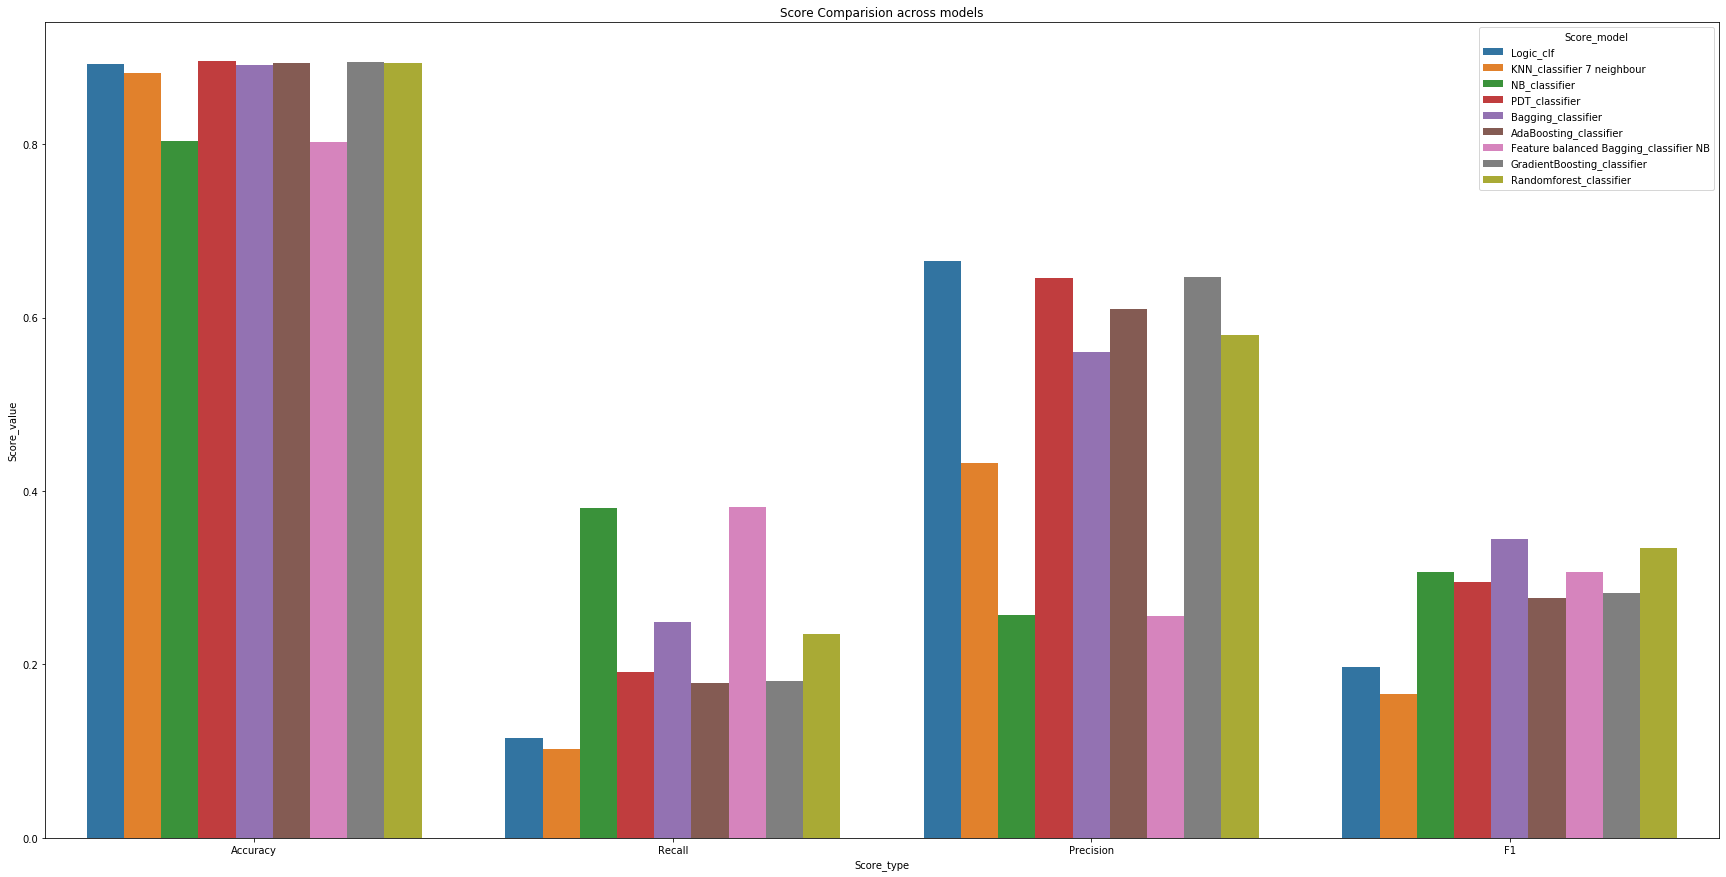

In [62]:
compare_score(Final_score_cmp['Score_type'],Final_score_cmp['Score_value'],Final_score_cmp['Score_model'])

Evaluating model after balancing the training data

In [63]:
imb_model=SMOTE()
xtrain,ytrain=imb_model.fit_resample(xtrain,ytrain)
Counter(ytrain)


Counter({0: 27909, 1: 27909})

In [64]:

#Logistic regression with 0.5 probability
mname='imb Logic_clf'
Logistic_model=models(mname)
Logistic_model.linearfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=Logistic_model.scores(Logistic_model.name,ytest,Logistic_model.ytest_predicted)
score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])
Final_score_cmp=Final_score_cmp.append(score_df)


#KNN classifier
n=3
mname='imb KNN_classifier '+str(n)+' neighbour'

KNN_model=models(mname)
KNN_model.knnfunction(n,xtrain,xtest,ytrain,ytest)
KNN_model.scores(KNN_model.name,ytest,KNN_model.ytest_predicted)

#KNN classifier
n=5
mname='imb KNN_classifier '+str(n)+' neighbour'

KNN_model=models(mname)
KNN_model.knnfunction(n,xtrain,xtest,ytrain,ytest)
KNN_model.scores(KNN_model.name,ytest,KNN_model.ytest_predicted)

#KNN classifier
n=7
mname='imb KNN_classifier '+str(n)+' neighbour'

KNN_model=models(mname)
KNN_model.knnfunction(n,xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=KNN_model.scores(KNN_model.name,ytest,KNN_model.ytest_predicted)
score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

#KNN classifier
n=10
mname='imb KNN_classifier '+str(n)+' neighbour'

KNN_model=models(mname)
KNN_model.knnfunction(n,xtrain,xtest,ytrain,ytest)
KNN_model.scores(KNN_model.name,ytest,KNN_model.ytest_predicted)

Final_score_cmp=Final_score_cmp.append(score_df)


#Naive Bayes
mname='imb NB_classifier'
NB_model=models(mname)
NB_model.NBfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=NB_model.scores(NB_model.name,ytest,NB_model.ytest_predicted)
score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])
Final_score_cmp=Final_score_cmp.append(score_df)


#Decision tree
mname='imb DT_classifier'
DT_model=models(mname)
DT_model.Decisiontreefunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=DT_model.scores(DT_model.name,ytest,DT_model.ytest_predicted)

m=2
mname='imb PDT_classifier'
PDT_model=models(mname)
PDT_model.PrunedDecisiontreefunction(m,xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=PDT_model.scores(PDT_model.name,ytest,PDT_model.ytest_predicted)
score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)


#Bagging
mname='imb Bagging_classifier'
Bagging_model=models(mname)
Bagging_model.Baggingfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=Bagging_model.scores(Bagging_model.name,ytest,Bagging_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)


#Bagging with NB
mname='imb balanced Bagging_classifier NB'
NB_Bagging_model=ensemblemodels(mname)
NB_Bagging_model.Baggingfunction(NB_model.model,50,xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=NB_Bagging_model.scores(NB_Bagging_model.name,ytest,NB_Bagging_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)



#AdaBoosting
mname='imb AdaBoosting_classifier'
Adaboost_model=models(mname)
Adaboost_model.AdaBoostfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=Adaboost_model.scores(Adaboost_model.name,ytest,Adaboost_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)



#GradientBoosting
mname='imb GradientBoosting_classifier'
GradientBoost_model=models(mname)
GradientBoost_model.GradientBoostfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=GradientBoost_model.scores(GradientBoost_model.name,ytest,GradientBoost_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)



#Randomforest
mname='imb Randomforest_classifier'
Randomforest_model=models(mname)
Randomforest_model.Randomforestfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=Randomforest_model.scores(Randomforest_model.name,ytest,Randomforest_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Acccuracy_score for imb Logic_clf is  0.6716307873783545
Recall_score for imb Logic_clf is  0.6750483558994197
Precision_score for imb Logic_clf is  0.20952571542925755
F1_score for imb Logic_clf is  0.3197923029932804


Acccuracy_score for imb KNN_classifier 3 neighbour is  0.6908728988498968
Recall_score for imb KNN_classifier 3 neighbour is  0.440361057382334
Precision_score for imb KNN_classifier 3 neighbour is  0.17040918163672655
F1_score for imb KNN_classifier 3 neighbour is  0.24572764885770823


Acccuracy_score for imb KNN_classifier 5 neighbour is  0.6637422589206724
Recall_score for imb KNN_classifier 5 neighbour is  0.47130883301096066
Precision_score for imb KNN_classifier 5 neighbour is  0.16346153846153846
F1_score for imb KNN_classifier 5 neighbour is  0.24273617798439312


Acccuracy_score for imb KNN_classifier 7 neighbour is  0.6458271896195813
Recall_score for imb KNN_classifier 7 neighbour is  0.498388136686009
Precision_score for imb KNN_classifier 7 neighbour is  

In [65]:
#SVM
c=.1
g=0.01
mname='imb SVM_classifier of c & gamma - ' + str(c) + ' & ' + str(g)
SVM_model=models(mname)
SVM_model.SVMfunction(c,g,xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=SVM_model.scores(SVM_model.name,ytest,SVM_model.ytest_predicted)
score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)

Acccuracy_score for imb SVM_classifier of c & gamma - 0.1 & 0.01 is  0.5347242701268062
Recall_score for imb SVM_classifier of c & gamma - 0.1 & 0.01 is  0.6892327530625403
Precision_score for imb SVM_classifier of c & gamma - 0.1 & 0.01 is  0.1549724557842853
F1_score for imb SVM_classifier of c & gamma - 0.1 & 0.01 is  0.25304769795242044




Tree visualization

In [15]:
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(DT_model.model, out_file=Credit_Tree_File, feature_names = x.columns, class_names = list('target'))
Credit_Tree_File.close()

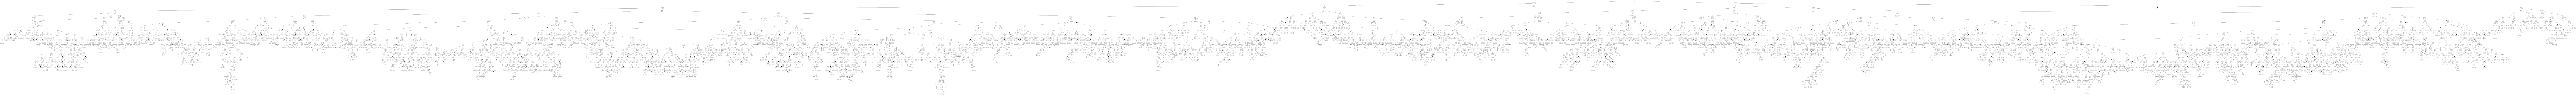

In [16]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))


In [21]:
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(PDT_model.model, out_file=Credit_Tree_File, feature_names = x.columns, class_names = ['0','1'])
Credit_Tree_File.close()

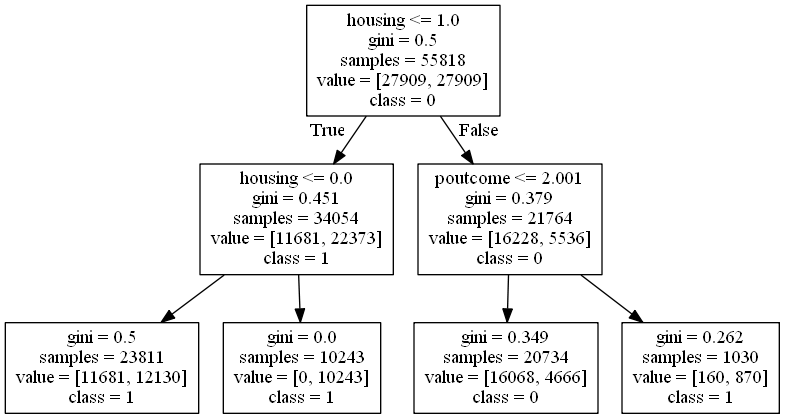

In [22]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

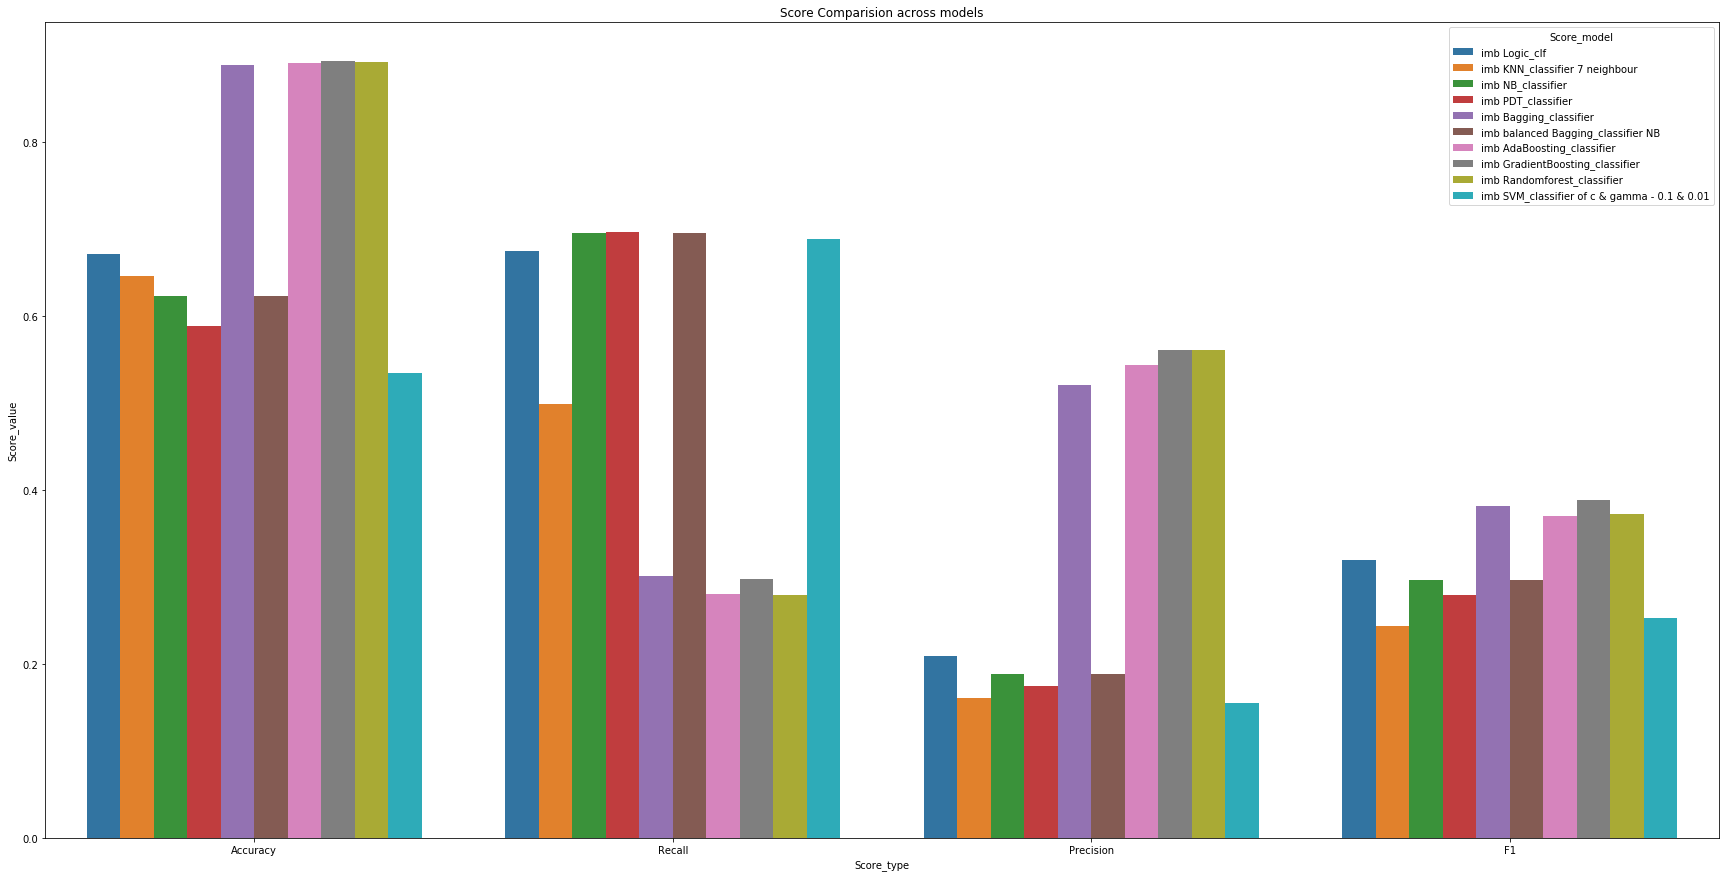

In [66]:
compare_score(Final_score_cmp[Final_score_cmp['Score_model'].str.contains('imb')]['Score_type'],Final_score_cmp[Final_score_cmp['Score_model'].str.contains('imb')]['Score_value'],Final_score_cmp[Final_score_cmp['Score_model'].str.contains('imb')]['Score_model'])

Getting the feature importance from decision tree

In [67]:
keys=list(x.columns)
values=list(DT_model.model.feature_importances_)
feature_importance_df=pd.DataFrame({'columns':keys,'feature_imp':values})
feature_importance_df.sort_values(by='feature_imp',ascending=False)

columns  feature_imp
6     housing     0.274310
10      month     0.193260
14   poutcome     0.094044
8     contact     0.091011
2     marital     0.082121
5     balance     0.067950
9         day     0.046894
0         age     0.040902
3   education     0.030934
11   campaign     0.023027
1         job     0.020768
12      pdays     0.018002
7        loan     0.007908
13   previous     0.007434
4     default     0.001435

In [68]:
keys=list(x.columns)
values=list(PDT_model.model.feature_importances_)
feature_importance_df=pd.DataFrame({'columns':keys,'feature_imp':values})
feature_importance_df.sort_values(by='feature_imp',ascending=False)

columns  feature_imp
6     housing     0.909951
14   poutcome     0.090049
0         age     0.000000
1         job     0.000000
2     marital     0.000000
3   education     0.000000
4     default     0.000000
5     balance     0.000000
7        loan     0.000000
8     contact     0.000000
9         day     0.000000
10      month     0.000000
11   campaign     0.000000
12      pdays     0.000000
13   previous     0.000000

Feature selection based on the EDA and feature importance from decision tree

In [81]:
x=bank_numeric_df[ ['housing','poutcome','month','contact','balance']]
y=bank_numeric_df['Target']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)
Final_score_cmp=pd.DataFrame(columns=['Score_type','Score_value','Score_model'])

In [82]:
imb_model=SMOTE()
xtrain,ytrain=imb_model.fit_resample(xtrain,ytrain)
Counter(ytrain)

Counter({0: 27909, 1: 27909})

In [83]:
#KNN classifier
n=5
mname='Feature balanced KNN_classifier '+str(n)+' neighbour'

KNN_model=ensemblemodels(mname)
KNN_model.knnfunction(n,xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=KNN_model.scores(KNN_model.name,ytest,KNN_model.ytest_predicted)
score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])
m=3
mname='Feature balanced PDT_classifier'
PDT_model=ensemblemodels(mname)
PDT_model.PrunedDecisiontreefunction(m,xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=PDT_model.scores(PDT_model.name,ytest,PDT_model.ytest_predicted)
score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)

#Naive Bayes
mname='Feature balanced NB_classifier'
NB_model=models(mname)
NB_model.NBfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=NB_model.scores(NB_model.name,ytest,NB_model.ytest_predicted)
score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])
Final_score_cmp=Final_score_cmp.append(score_df)

#Bagging with NB
mname='Feature balanced balanced Bagging_classifier NB'
NB_Bagging_model=ensemblemodels(mname)
NB_Bagging_model.Baggingfunction(NB_model.model,50,xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=NB_Bagging_model.scores(NB_Bagging_model.name,ytest,NB_Bagging_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)


#Bagging with KNN
mname='Feature balanced Bagging_classifier KNN'
KNN_Bagging_model=ensemblemodels(mname)
KNN_Bagging_model.Baggingfunction(KNN_model.model,50,xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=KNN_Bagging_model.scores(KNN_Bagging_model.name,ytest,KNN_Bagging_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)

#Bagging 
mname='Feature balanced Bagging_classifier'
Bagging_model=models(mname)
Bagging_model.Baggingfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=Bagging_model.scores(Bagging_model.name,ytest,Bagging_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)



#AdaBoosting
mname='Feature balanced AdaBoosting_classifier'
Adaboost_model=models(mname)
Adaboost_model.AdaBoostfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=Adaboost_model.scores(Adaboost_model.name,ytest,Adaboost_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)



#GradientBoosting
mname='Feature balanced GradientBoosting_classifier'
GradientBoost_model=models(mname)
GradientBoost_model.GradientBoostfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=GradientBoost_model.scores(GradientBoost_model.name,ytest,GradientBoost_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)

#Randomforest
mname='Feature balanced Randomforest_classifier'
Randomforest_model=ensemblemodels(mname)
Randomforest_model.Randomforestfunction(50,2,1,xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=Randomforest_model.scores(Randomforest_model.name,ytest,Randomforest_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)



Acccuracy_score for Feature balanced KNN_classifier 5 neighbour is  0.6958124447065762
Recall_score for Feature balanced KNN_classifier 5 neighbour is  0.42424242424242425
Precision_score for Feature balanced KNN_classifier 5 neighbour is  0.16910819840657929
F1_score for Feature balanced KNN_classifier 5 neighbour is  0.24182285924292543


Acccuracy_score for Feature balanced PDT_classifier is  0.8709082866411089
Recall_score for Feature balanced PDT_classifier is  0.24822695035460993
Precision_score for Feature balanced PDT_classifier is  0.39690721649484534
F1_score for Feature balanced PDT_classifier is  0.30543435144783815


Acccuracy_score for Feature balanced NB_classifier is  0.6073429666764966
Recall_score for Feature balanced NB_classifier is  0.7130883301096067
Precision_score for Feature balanced NB_classifier is  0.1847335894437949
F1_score for Feature balanced NB_classifier is  0.2934465375431149


Acccuracy_score for Feature balanced balanced Bagging_classifier NB is  0.

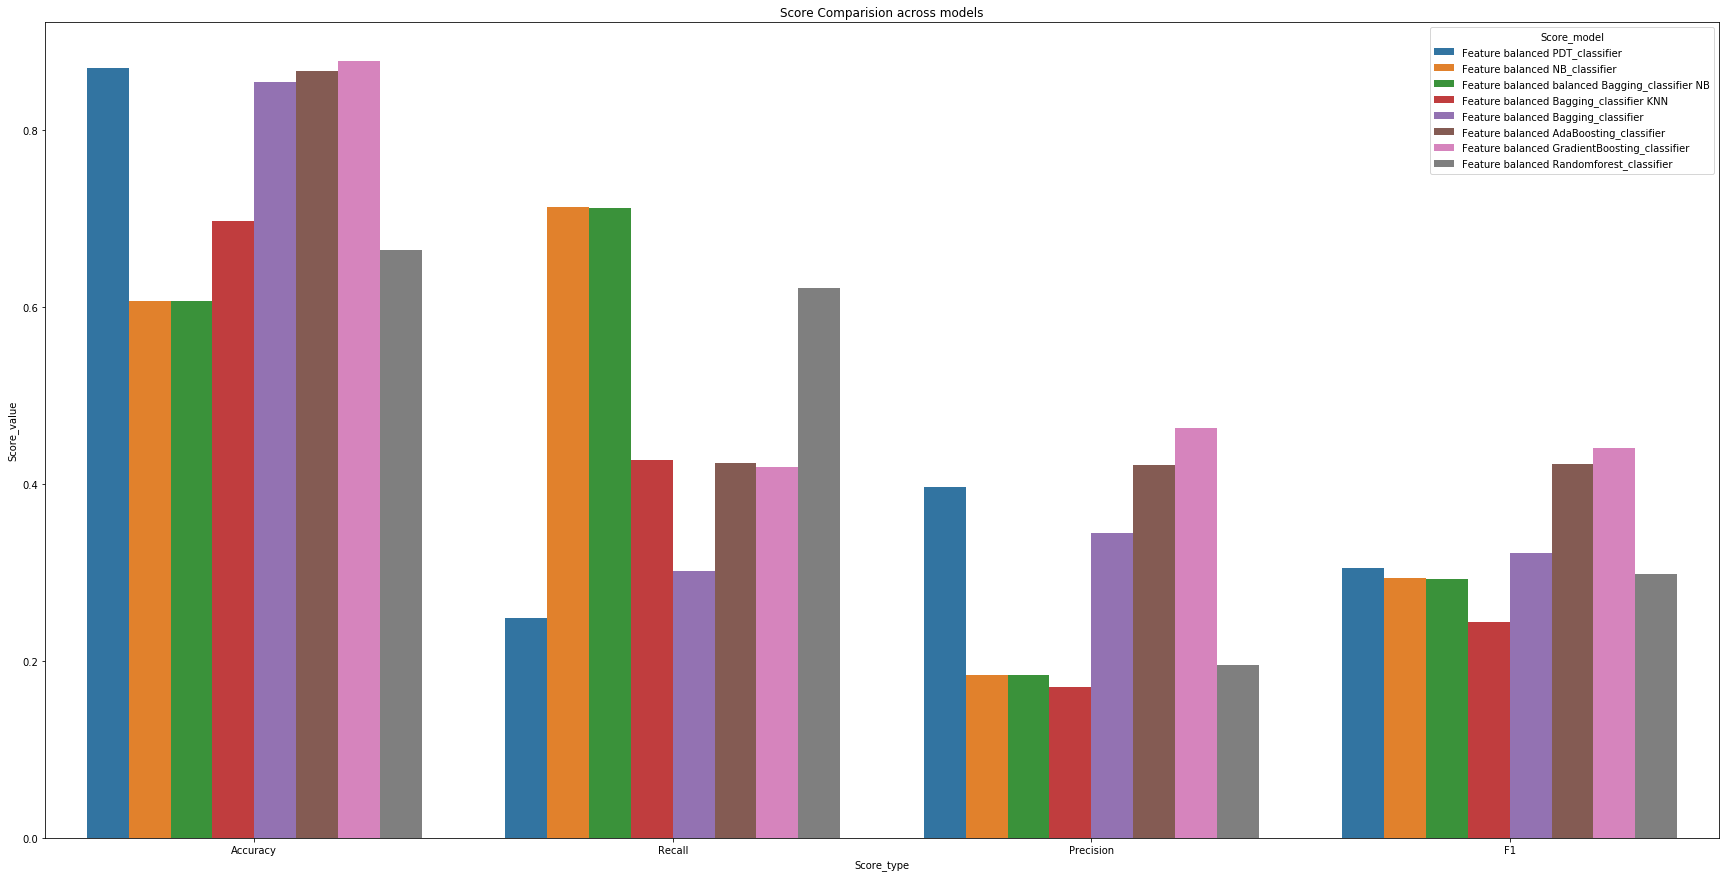

In [84]:
compare_score(Final_score_cmp[Final_score_cmp['Score_model'].str.contains('Feature balanced')]['Score_type'],Final_score_cmp[Final_score_cmp['Score_model'].str.contains('Feature balanced')]['Score_value'],Final_score_cmp[Final_score_cmp['Score_model'].str.contains('Feature balanced')]['Score_model'])

In [85]:
x=bank_numeric_df[ ['housing','poutcome']]
y=bank_numeric_df['Target']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)
Final_score_cmp=pd.DataFrame(columns=['Score_type','Score_value','Score_model'])
imb_model=SMOTE()
xtrain,ytrain=imb_model.fit_resample(xtrain,ytrain)
Counter(ytrain)

Counter({0: 27909, 1: 27909})

In [86]:
#KNN classifier
n=5
mname='Feature balanced KNN_classifier '+str(n)+' neighbour'

KNN_model=ensemblemodels(mname)
KNN_model.knnfunction(n,xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=KNN_model.scores(KNN_model.name,ytest,KNN_model.ytest_predicted)
score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])
m=3
mname='Feature balanced PDT_classifier'
PDT_model=ensemblemodels(mname)
PDT_model.PrunedDecisiontreefunction(m,xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=PDT_model.scores(PDT_model.name,ytest,PDT_model.ytest_predicted)
score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)

#Naive Bayes
mname='Feature balanced NB_classifier'
NB_model=models(mname)
NB_model.NBfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=NB_model.scores(NB_model.name,ytest,NB_model.ytest_predicted)
score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])
Final_score_cmp=Final_score_cmp.append(score_df)

#Bagging with NB
mname='Feature balanced balanced Bagging_classifier NB'
NB_Bagging_model=ensemblemodels(mname)
NB_Bagging_model.Baggingfunction(NB_model.model,50,xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=NB_Bagging_model.scores(NB_Bagging_model.name,ytest,NB_Bagging_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)


#Bagging with KNN
mname='Feature balanced Bagging_classifier KNN'
KNN_Bagging_model=ensemblemodels(mname)
KNN_Bagging_model.Baggingfunction(KNN_model.model,50,xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=KNN_Bagging_model.scores(KNN_Bagging_model.name,ytest,KNN_Bagging_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)

#Bagging 
mname='Feature balanced Bagging_classifier'
Bagging_model=models(mname)
Bagging_model.Baggingfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=Bagging_model.scores(Bagging_model.name,ytest,Bagging_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)



#AdaBoosting
mname='Feature balanced AdaBoosting_classifier'
Adaboost_model=models(mname)
Adaboost_model.AdaBoostfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=Adaboost_model.scores(Adaboost_model.name,ytest,Adaboost_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)



#GradientBoosting
mname='Feature balanced GradientBoosting_classifier'
GradientBoost_model=models(mname)
GradientBoost_model.GradientBoostfunction(xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=GradientBoost_model.scores(GradientBoost_model.name,ytest,GradientBoost_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)

#Randomforest
mname='Feature balanced Randomforest_classifier'
Randomforest_model=ensemblemodels(mname)
Randomforest_model.Randomforestfunction(50,2,1,xtrain,xtest,ytrain,ytest)
accuracy,recall,precision,f1=Randomforest_model.scores(Randomforest_model.name,ytest,Randomforest_model.ytest_predicted)

score_df=pd.DataFrame([['Accuracy',accuracy,mname],['Recall',recall,mname]
                      ,['Precision',precision,mname],['F1',f1,mname]],columns=['Score_type','Score_value','Score_model'])

Final_score_cmp=Final_score_cmp.append(score_df)



Acccuracy_score for Feature balanced KNN_classifier 5 neighbour is  0.8717929814214096
Recall_score for Feature balanced KNN_classifier 5 neighbour is  0.29593810444874274
Precision_score for Feature balanced KNN_classifier 5 neighbour is  0.41500904159132007
F1_score for Feature balanced KNN_classifier 5 neighbour is  0.3455024463680843


Acccuracy_score for Feature balanced PDT_classifier is  0.5887643762901799
Recall_score for Feature balanced PDT_classifier is  0.696969696969697
Precision_score for Feature balanced PDT_classifier is  0.17466472774276942
F1_score for Feature balanced PDT_classifier is  0.279328165374677


Acccuracy_score for Feature balanced NB_classifier is  0.8081686818047773
Recall_score for Feature balanced NB_classifier is  0.3481624758220503
Precision_score for Feature balanced NB_classifier is  0.25340215861098075
F1_score for Feature balanced NB_classifier is  0.2933188484519283


Acccuracy_score for Feature balanced balanced Bagging_classifier NB is  0.8081

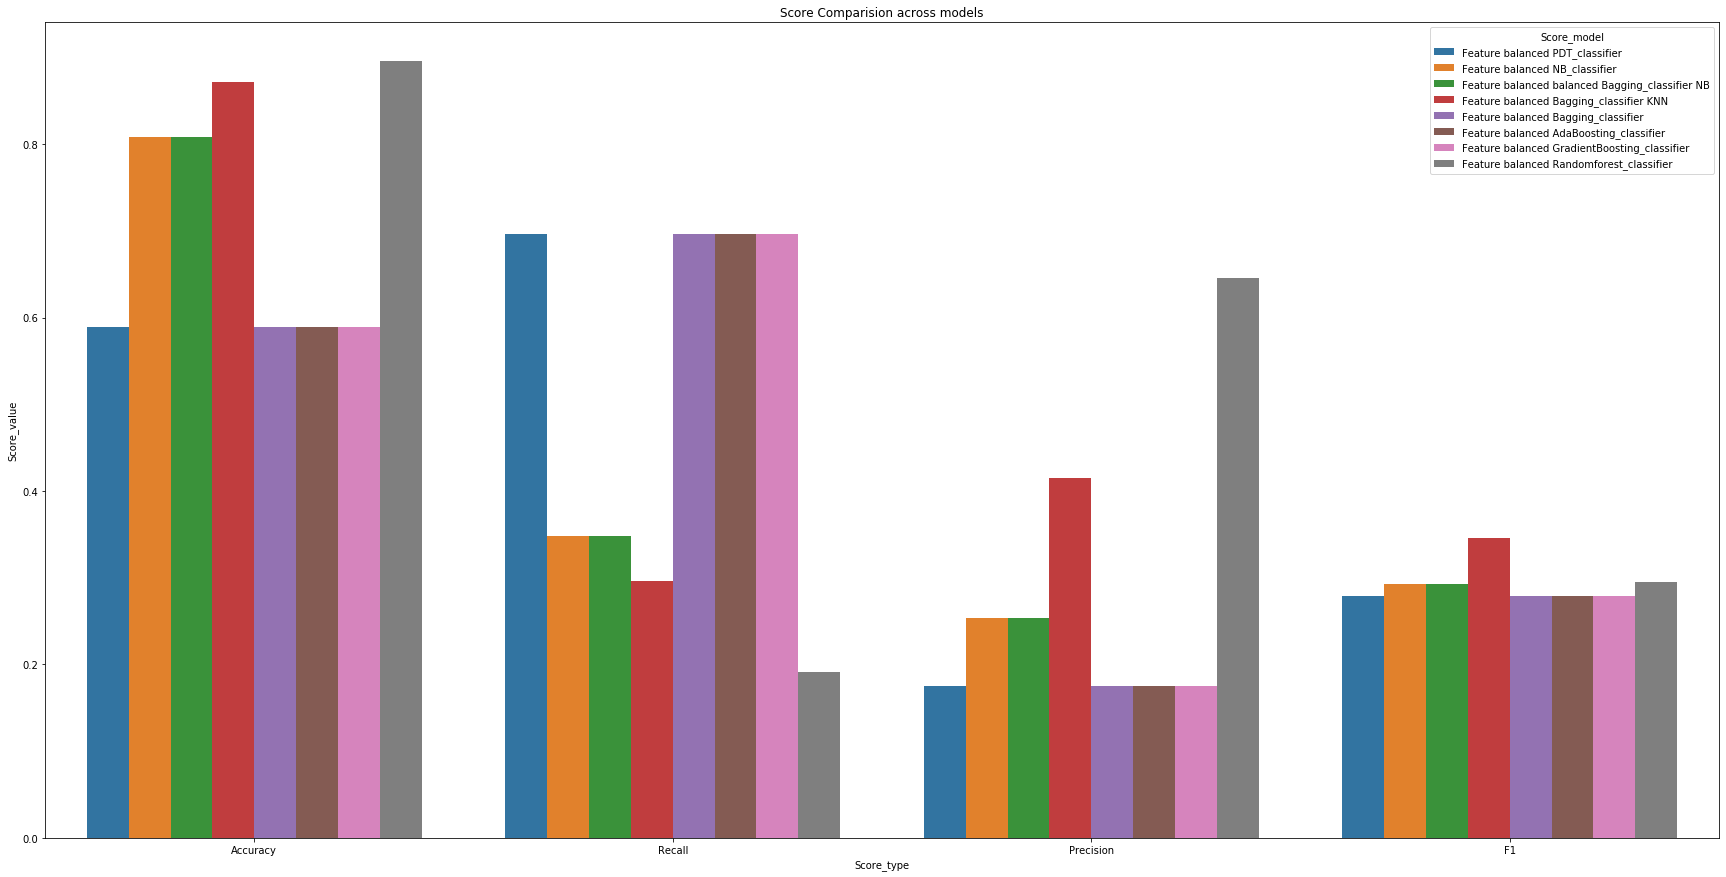

In [87]:
compare_score(Final_score_cmp[Final_score_cmp['Score_model'].str.contains('Feature balanced')]['Score_type'],Final_score_cmp[Final_score_cmp['Score_model'].str.contains('Feature balanced')]['Score_value'],Final_score_cmp[Final_score_cmp['Score_model'].str.contains('Feature balanced')]['Score_model'])

Conclusion:
We are trying to predict whether the person will opt for term deposit or not. If the person is opt for term deposit it is a revenue gain to the company. Having few misclassification as going to opt term deposit will not make much impact, only an additional effort but predicting the person may opt for term deposit as not will be a loss to the company. So we have to identify the model which will have good Recall and optimal precision which will be best fit for this situation.

We have evaluated the model first with all the parameters and evaluated the performance.Then balanced the data with same features and perform the evaluation. Later used only the important features from EDA,feature importance and evaluated the perofrmance.Finally balanced the data with important features and evaluated the model.


Based on the above metrics shown,

Before feature selection: All features with imblearn treated

Logistic regression is having good recall.
NB and bagging with NB is having good recall.
Pruned DT is having good recall.
SVM is having good recall but consuming more time.

After feature selection - ['housing','poutcome','month','contact','balance','marital']

NB and bagging with NB is having good recall.
Random forest is having good recall but no consistency because of randomness.

After Feature selection ['housing','poutcome']

Logistic Regression,Pruned DT,Adaboosing,Gradient boosting,Bagging having good recall.

hence these algorithms will be best suited for this situation.